# Making smaller chunks of data from Google Big Query

In [ ]:
import numpy as np
import pandas as pd

from google.cloud import bigquery
from google.oauth2 import service_account

from colorama import Fore, Style

In [ ]:
#np.random.seed(42) # uncomment if you want reproducible "random" samples

## Defining names of GBQ environment & get data from GBQ

In [ ]:
bc_project_name = "amex-data"

bc_feature_dataset_name = "train_data"
bc_target_dataset_name = "train_labels"

bc_feature_table_name = "train_data"
bc_target_table_name = "train_labels"

target_table = f"{bc_project_name}.{bc_target_dataset_name}.{bc_target_table_name}" #amex-data.train_labels.train_labels
feature_table = f"{bc_project_name}.{bc_feature_dataset_name}.{bc_feature_table_name}" #amex-data.train_data.train_data


In [ ]:
!pwd

Go [here](https://console.cloud.google.com/iam-admin/serviceaccounts?project=amex-data) and add/create a key ID. Download it as .json. Use the path of the file below.

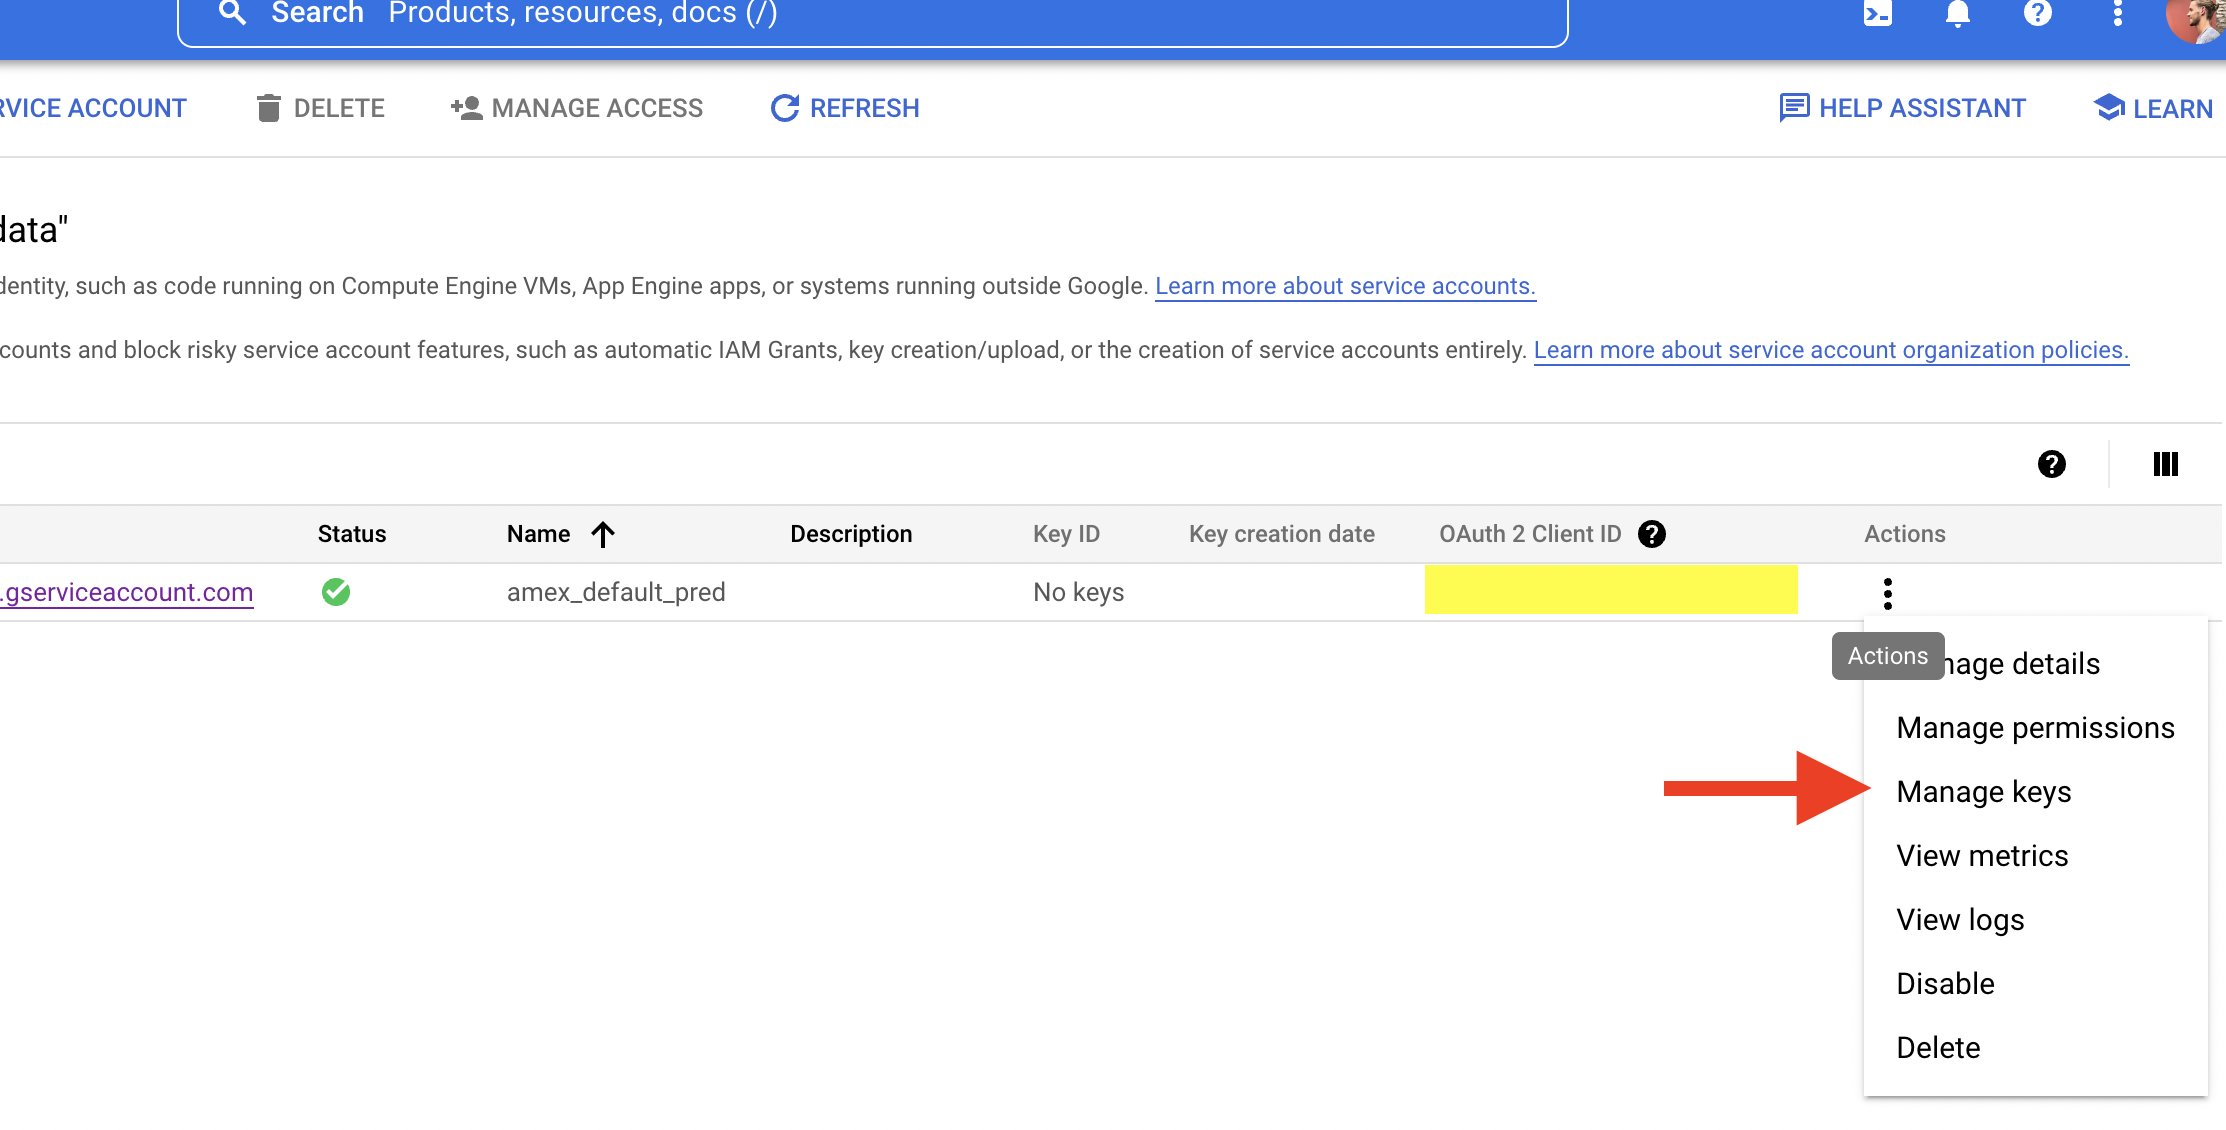

In [ ]:
# ADAPT PATH TO YOUR MACHINE
key_path = "/home/slawa/code/code-rep0/projects/auth/amex-data-bb4a9f2f4dd1.json"

In [ ]:
credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

In [ ]:
client = bigquery.Client(credentials=credentials)

target_data = client.list_rows(target_table)

In [ ]:
df = target_data.to_dataframe()

payer = df[df['target'] == 0] # 0 for payers

defaulter =  df[df['target'] == 1] # 1 for defaulters

defaulter_IDs = defaulters['customer_ID']

payer_IDs = payers['customer_ID']

## Set composition of sub-dataset

In [ ]:
percentage_data = 0.001 ## how much of the data do we want
percentage_defaulter = 0.25 ## same as in the whole data  

In [ ]:
defaulter_sample_size = round(df.shape[0]*percentage_data*percentage_defaulter)

payer_sample_size = round(df.shape[0]*percentage_data*(1-percentage_defaulter))

random_defaulter_sample = tuple(np.random.choice(defaulter_IDs, 
                                                 defaulter_sample_size))

random_payer_sample = tuple(np.random.choice(payer_IDs, 
                                              payer_sample_size))

In [ ]:
feature_query_defaulter = f"SELECT * FROM {feature_table} WHERE customer_ID in {random_defaulter_sample}"
feature_query_payer = f"SELECT * FROM {feature_table} WHERE customer_ID in {random_payer_sample}"

# defaulter_data = client.query(feature_query_defaulter).to_dataframe()
# payer_data = client.query(feature_query_payer).to_dataframe()

In [ ]:
defaulter_data.shape

In [ ]:
payer_data.shape

In [ ]:
!pwd

## Saves subdatasets locally

Adapt PATH for your machine

In [ ]:
#defaulter_data.to_csv(f'/home/slawa/code/code-rep0/projects/data/defaulter_data_{defaulter_data.shape[0]}.csv')

#payer_data.to_csv(f'/home/slawa/code/code-rep0/projects/data/payer_data_{payer_data.shape[0]}.csv')

In [ ]:
defaulter_data.shape[0]/defaulter_sample_size # average number of time points for defaulters

In [ ]:
payer_data.shape[0]/payer_sample_size # average number of time points for payers

In [ ]:
payer_data_table_name = f"payer_data_{payer_data.shape[0]}"
defaulter_data_table_name = f"defaulter_data_{defaulter_data.shape[0]}"

payer_data_table = f"{bc_project_name}.{bc_feature_dataset_name}.{payer_data_table_name}"
defaulter_data_table = f"{bc_project_name}.{bc_feature_dataset_name}.{defaulter_data_table_name}"

Save sub-datasets on GBQ

In [ ]:
#client.create_table(payer_data_table);

In [ ]:
#client.create_table(defaulter_data_table);

In [ ]:

# def get_bq_chunk(table: str,
#                  index: int,
#                  chunk_size: int,
#                  dtypes: dict = None,
#                  verbose=True) -> pd.DataFrame:
#     """
#     return a chunk of a big query dataset table
#     format the output dataframe according to the provided data types
#     """

#     qtable = f"{PROJECT}.{DATASET}.{table}"


#     client = bigquery.Client()


#     if verbose:
#         print(Fore.MAGENTA + f"Source data from big query {table}: {chunk_size if chunk_size is not None else 'all'} rows (from row {index})" + Style.RESET_ALL)


#     try:
#         rows = client.list_rows(qtable, start_index=index, max_results=chunk_size)
#         df = rows.to_dataframe()



#     except pd.errors.EmptyDataError:

#         return None


#     return df  # YOUR CODE HERE